<a href="https://colab.research.google.com/github/LikhithRam/Insurance-cross-sell/blob/main/All_stars_ML_Health_insurance_cross_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# <b> Business Goal </b>
Building a model to see whether a client would be keen on Vehicle Insurance is very useful for the organization since it can then accordingly plan its marketing strategy to connect with those clients and advance its plan of action and income.


# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Models Importing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [5]:
#importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [7]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


# Step 1 : Statistical Inference and Data pre-processing

In [9]:
#Total Observations
print("rows: ", df.shape[0])

#Total Features
print("columns: ", df.shape[1])

rows:  381109
columns:  12


In [10]:
#Overview of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
#Checking for data types of features given in the dataset
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [12]:
#Data Description
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
#Checking for Missing Values in given dataset
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [14]:
# Finding Unique Values for each Variable
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

# <b> Data Visualization

Target feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Percentage of Response variable')

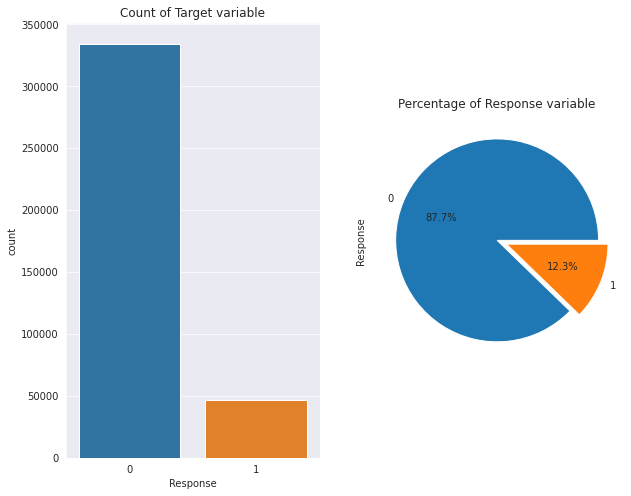

In [15]:
#checking the distribution of target variable
plt.subplot(1, 2, 1)
sns.countplot(df['Response'])
plt.title('Count of Target variable')

plt.subplot(1,2,2)
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',figsize = (10,8),explode = [0,0.1])

plt.title('Percentage of Response variable')

- From the above graph, we can see that the count of people not opting for the vehicle insurance is more than the ones opting for. 


Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


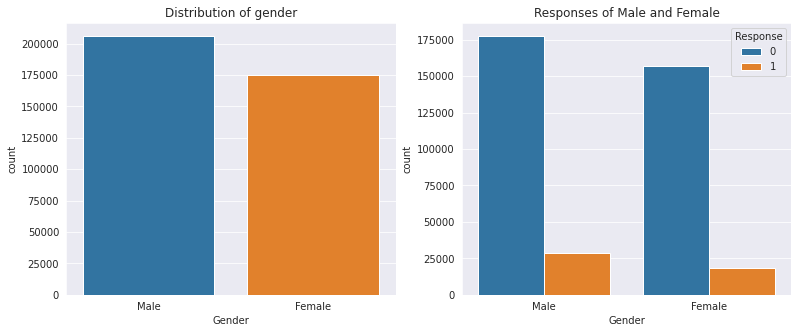

In [16]:
#Checking the distribution of Gender variable and their responses
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'])
plt.title("Distribution of gender")
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'])
plt.title("Responses of Male and Female")
plt.show()

- We can see that, the count of Male opting for the insurance is more than that of Female probably because of the assymetrical distribution of data in the given dataset.

Age variable

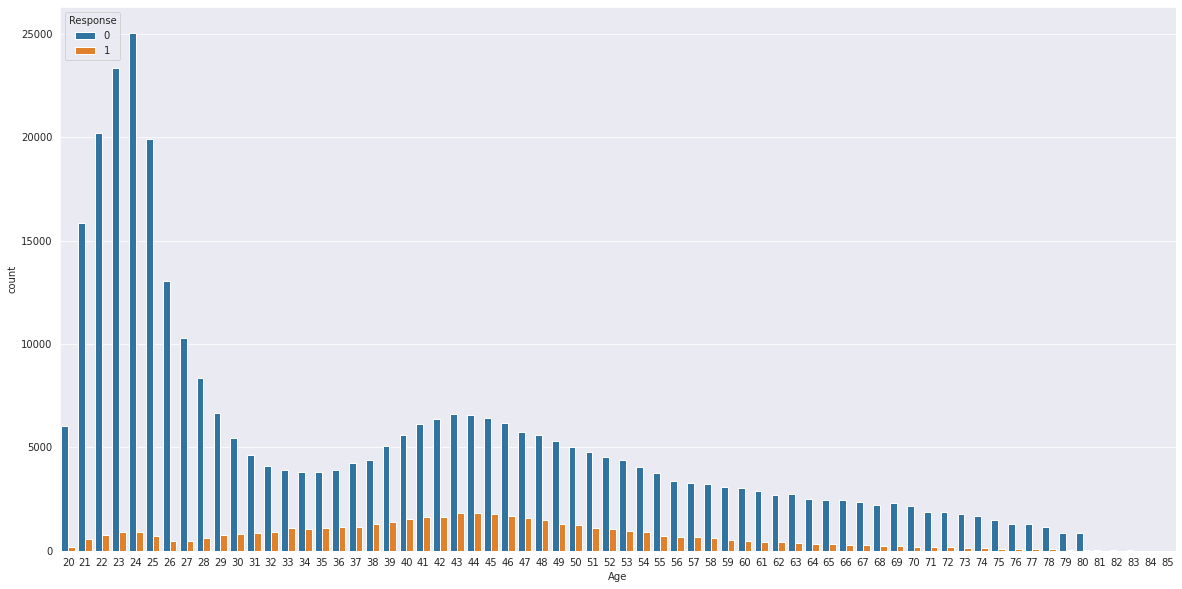

In [17]:
#Checking the distribution of age along with responses
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)

- We can see that people of age 28-55 tend to buy insurance more than the ones who doesn't fall under this category.

Driving License

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


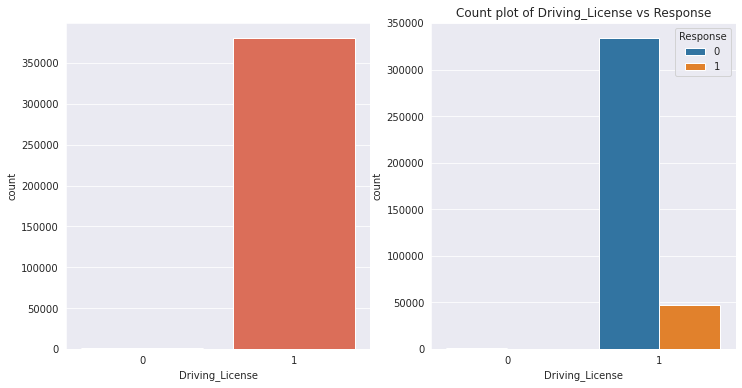

In [18]:
#Checking the distribution of people with driving license along with the responses
print("Percentage of  Driving_License feature\n ")
print(df['Driving_License'].value_counts()/len(df)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(df['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot('Driving_License', hue = 'Response',ax =axx[1],data = df)

- We can see that, the major chunk of people in our dataset have driving license(99%)

Previously insured

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


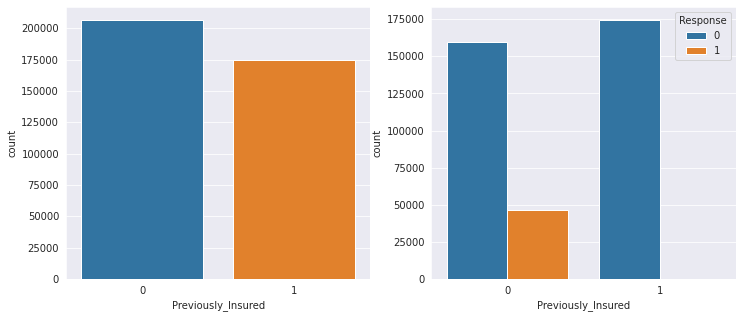

In [19]:
#Checking the distribution of people if they were previously insured along with their responses
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(df['Previously_Insured'],ax = axx[0])
sns.countplot('Previously_Insured', hue = 'Response',ax =axx[1],data = df)

- We can see that the people who were not insured previously are the ones who are buying the insurance now and there's a huge dip for the ones who were previously insured.

Vehicle age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


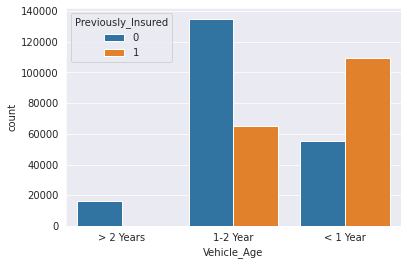

In [20]:
#Checking the distribution of vehicle age along with previously insured
sns.countplot(df["Vehicle_Age"],hue=df["Previously_Insured"])

- We can see that people with vehicle age less than 1 year are the ones who bought the insurance followed by the ones with vehicles which are 1-2 year old. And people with vehicle age greater than 2 years old are showing least interest in buying the insurance this time.

Vehicle damage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


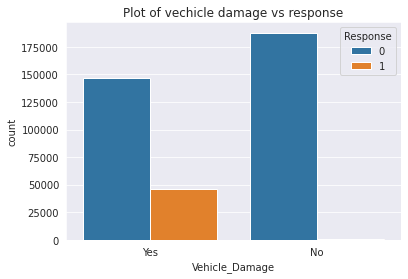

In [21]:
#Checking the distribution of vehicle damage along with the responses
plt.title("Plot of vechicle damage vs response")
sns.countplot('Vehicle_Damage', hue = 'Response',data = df)
plt.show()

- We can see that people whose vehicles are damaged tend to buy insurance compared to the ones whose vehicles are not.

Annual Premium

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


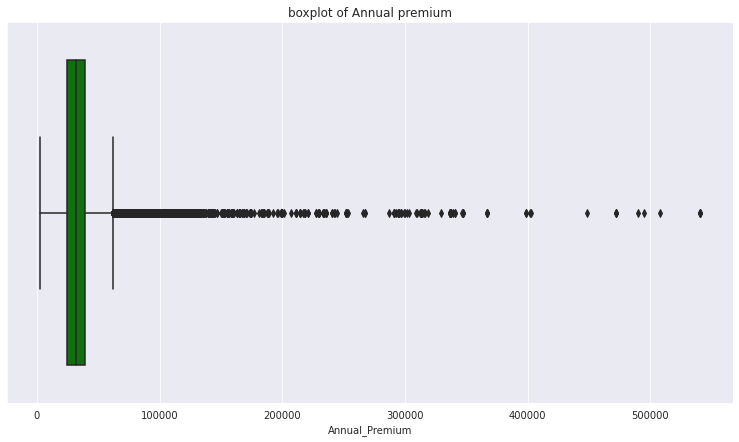

In [22]:
#Checking the distribution of insurance premium
plt.figure(figsize=(13,7))
sns.boxplot(df['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

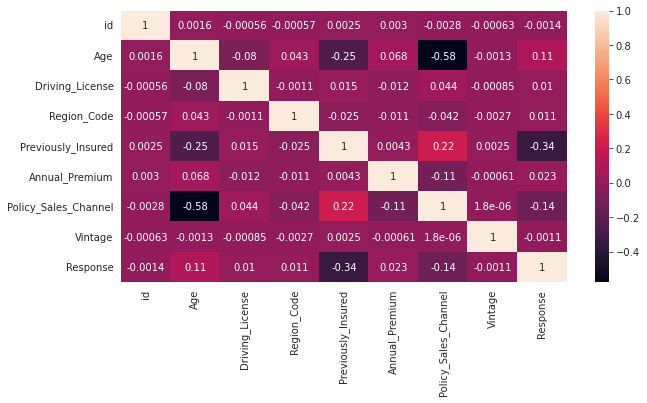

In [23]:
#Checking correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

## <b>Label Encoding

In [24]:
#Encoding categorical variables into numeric Values
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

# Seperating Target and Independant Variable

In [25]:
x=df.drop(['Response'],axis=1) 
y=df['Response']   
x.head()   

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39


## <b>Feature Selection

In [26]:
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()
# model.fit(x,y)
# print(model.feature_importances_)


In [27]:
# feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# feat_importances.nlargest(11).plot(kind='barh')
# plt.show()

***We can remove less important features (Driving_License, Gender) from the data set***

In [28]:
x=x.drop(['Driving_License','Gender'],axis=1)

In [29]:
df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

**As we see, Target Variable category is unevenly distributed. Hence we need to handle this imbalanced data.**

## Handling Data Imbalance

In [33]:
from imblearn.over_sampling import SMOTE
cols    = df.columns
target_col = ['Response']

smote_X = x
smote_Y = y

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,test_size = .25 ,random_state = 111)
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_resample(xtrain, ytrain)

## Spliting of data into train and test data

In [37]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=0)



## Scaling

In [36]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtest

array([[ 0.26728713, -0.95475991, -1.39062523, ...,  0.47576066,
         0.73670425,  1.34732072],
       [ 0.03602199,  0.14106638,  0.12146714, ..., -0.32864093,
         0.22013717,  0.02118141],
       [ 0.11711614,  2.13933784, -1.39062523, ...,  4.82773917,
        -1.58784763, -1.00627787],
       ...,
       [-1.27489254, -0.82583917, -0.8613929 , ...,  0.49794502,
         0.73670425,  1.02474629],
       [ 1.23119032,  0.65674934, -0.0297421 , ...,  0.38253974,
         0.93964132, -0.98238347],
       [-1.4594974 ,  0.72120971,  0.65069947, ..., -0.18441344,
         0.22013717, -0.0982906 ]])

## Model Training & Evaluation

## Logistic Regression

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Logistic Regression Algorithm
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

# Model Prediction
ypred=logreg.predict(xtest)


In [ ]:
logreg=LogisticRegression()
logreg.fit(x_smote,y_smote)

# Model Prediction
ypredsmote=logreg.predict(xtest)

In [ ]:
print(f"Logistic regression \n{classification_report(ytest, ypred)}")

In [ ]:
# Model Evaluation
print(f"Logistic regression \n{classification_report(ytest, ypredsmote)}")

## Decision Tree Classifier

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [39]:
models = []
models.append(("DT-gini  ", DecisionTreeClassifier(criterion="gini")))
models.append(("DT-entropy  ", DecisionTreeClassifier(criterion="entropy")))


for name, model in models:
    model.fit(xtrain, ytrain)
    ypred= model.predict(xtest)
    print(f"Name -: {name}\n{classification_report(ytest, ypred)}")

Name -: DT-gini  
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    100241
           1       0.29      0.31      0.30     14092

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.82    114333

Name -: DT-entropy  
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    100241
           1       0.29      0.31      0.30     14092

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.83    114333



In [40]:
models = []
models.append(("DT-gini  ", DecisionTreeClassifier(criterion="gini")))
models.append(("DT-entropy  ", DecisionTreeClassifier(criterion="entropy")))


for name, model in models:
    model.fit(x_smote, y_smote)
    ypredsmote= model.predict(xtest)
    print(f"Name -: {name}\n{classification_report(ytest, ypredsmote)}")

Name -: DT-gini  
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    100241
           1       0.29      0.35      0.32     14092

    accuracy                           0.82    114333
   macro avg       0.60      0.62      0.61    114333
weighted avg       0.83      0.82      0.82    114333

Name -: DT-entropy  
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    100241
           1       0.29      0.34      0.31     14092

    accuracy                           0.82    114333
   macro avg       0.60      0.61      0.60    114333
weighted avg       0.83      0.82      0.82    114333



In [ ]:
# Model Evaluation
print(f"Decision Tree Classifier \n{classification_report(ytest, ypred)}")

In [41]:
print(f"Decision Tree Classifier \n{classification_report(ytest, ypredsmote)}")

Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    100241
           1       0.29      0.34      0.31     14092

    accuracy                           0.82    114333
   macro avg       0.60      0.61      0.60    114333
weighted avg       0.83      0.82      0.82    114333



## Random Forest Classifier

In [ ]:
# Random Forest Classifier Algorithm
random_forest=RandomForestClassifier()
random_forest.fit(xtrain,ytrain)

# Model Prediction
ypred=random_forest.predict(xtest)

In [ ]:
# Model Evaluation
from sklearn import metrics
print(f"Random Forest Classifier \n{classification_report(ytest, ypred)}")
print(metrics.confusion_matrix(ytest, ypred))

## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

random_f = RandomForestClassifier()
model = RandomizedSearchCV(estimator = random_f, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain,ytrain)